In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import siglib

Define Constants
---

In [2]:
from siglib import data_m

min_depth = 100; clonality = (0, 0.4); notation = 'pyrimidine'

EG10gff_file = '/home/clint/essigmann_analysis/afb1_signature/data/EG10_corrected.gff'
EG10fasta_file = '/home/clint/essigmann_analysis/afb1_signature/data/EG10_corrected.fasta'
merfile = '/home/clint/essigmann_analysis/afb1_signature/data/EG10_slice_counts.jf'

Read in Trinucleotide Frequencies of Reference Genome
---

In [3]:
from jellywrap import Jellyfish, dna_notation

j = Jellyfish()
_ = j.read_mer_file(merfile)

Parse all Files and Plot Mutations *per* Genomic Position
---

Sample: 1798
Found 50 Mutations
Sample: 3497-1440L
Found 65 Mutations
Sample: 3497-1483L
Found 50 Mutations
Sample: 3497-1488L
Found 59 Mutations
Sample: 6210
Found 1713 Mutations
Sample: 6211
Found 1699 Mutations
Sample: 6212
Found 51 Mutations
Sample: 6213
Found 2758 Mutations
Sample: 1795
Found 43 Mutations
Sample: 3494-1440L
Found 15 Mutations
Sample: 3494-1483L
Found 17 Mutations
Sample: 3494-1488L
Found 46 Mutations
Sample: 4510
Found 324 Mutations
Sample: 4511
Found 216 Mutations


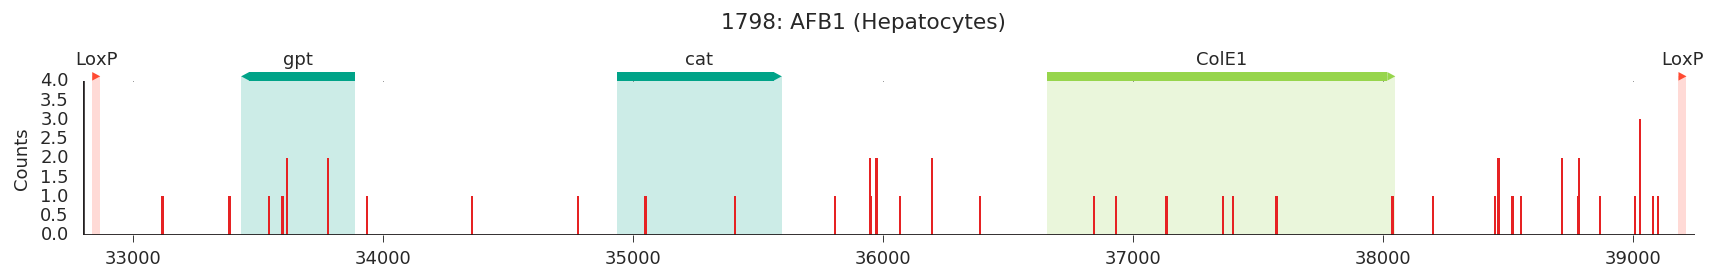

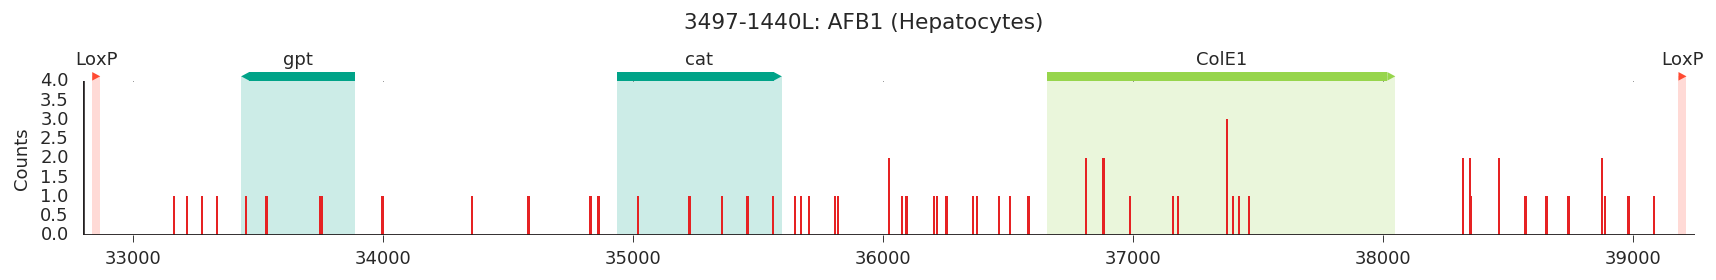

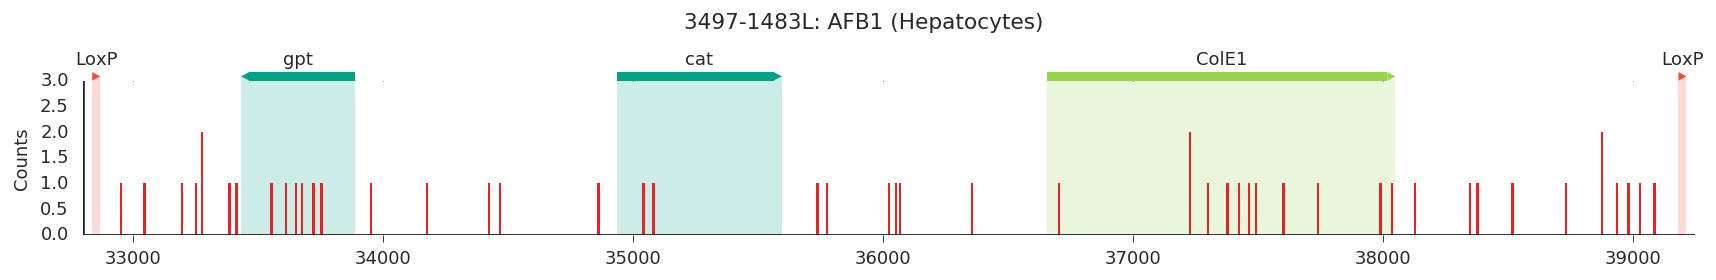

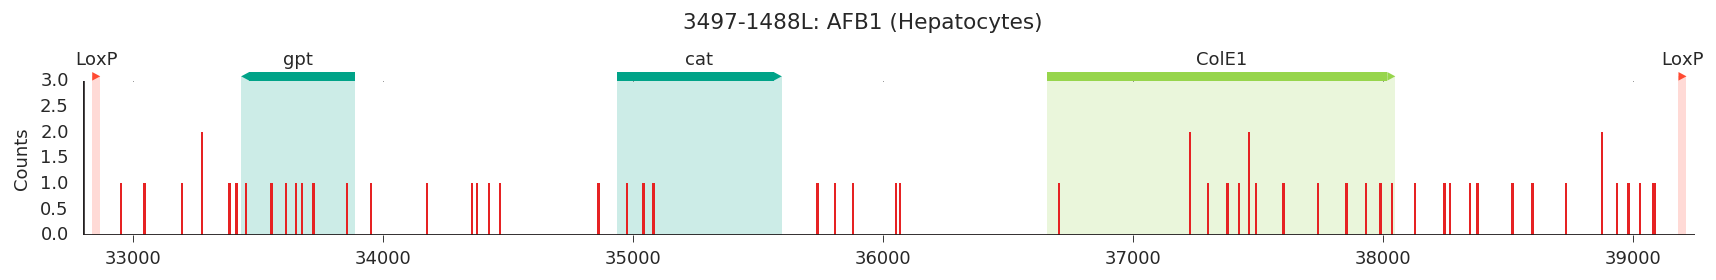

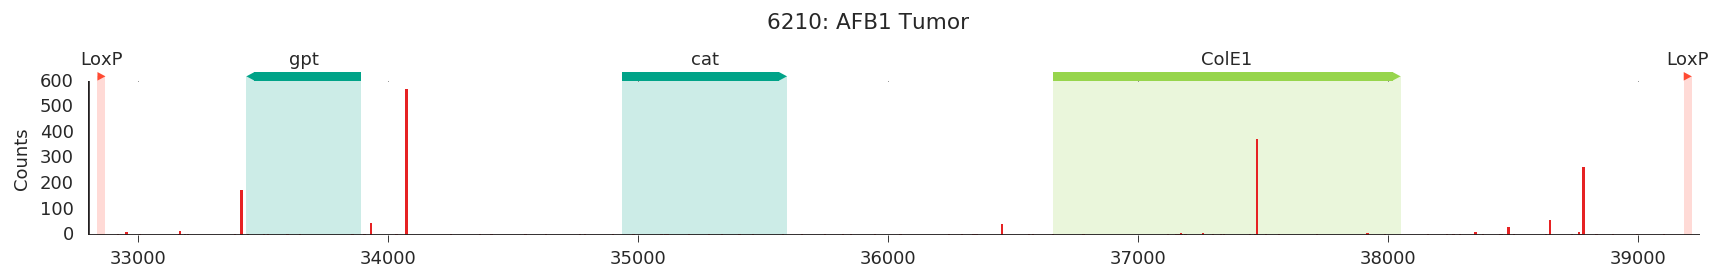

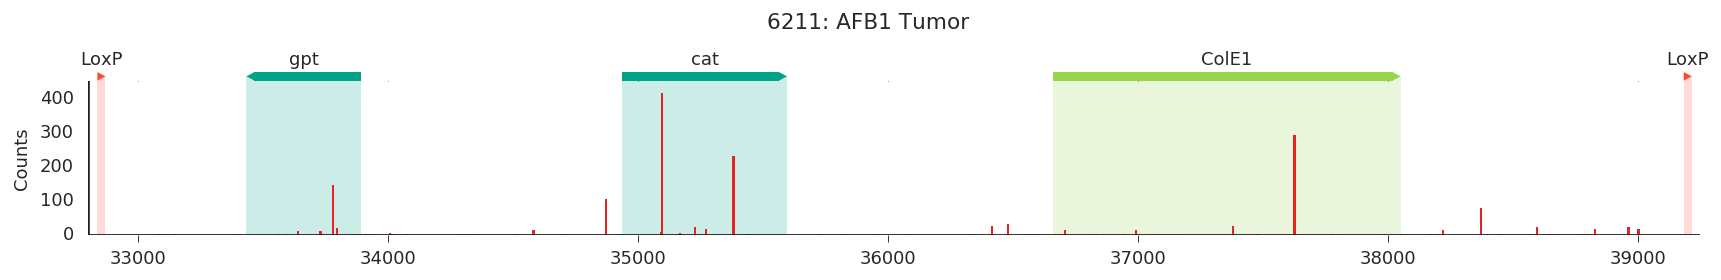

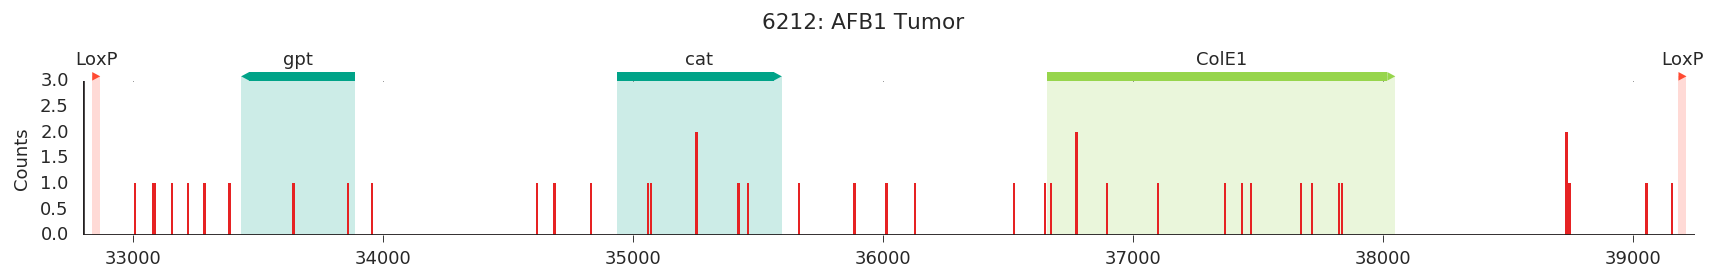

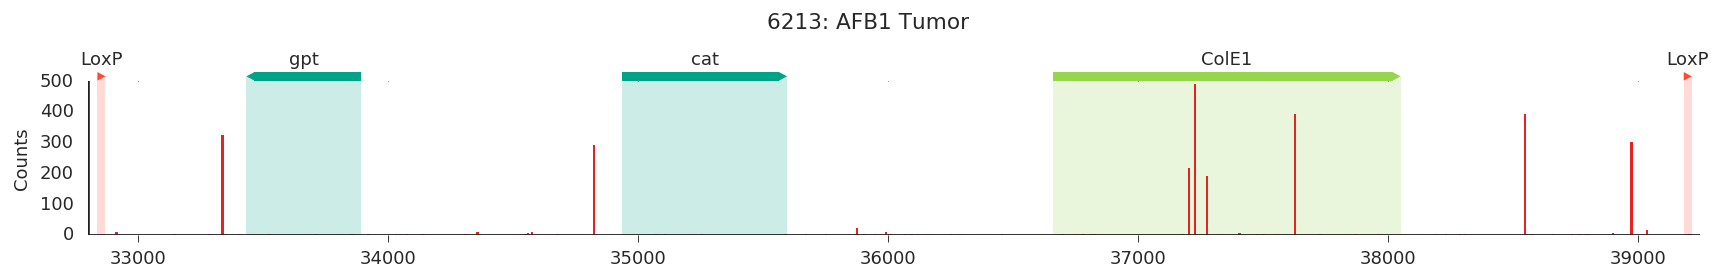

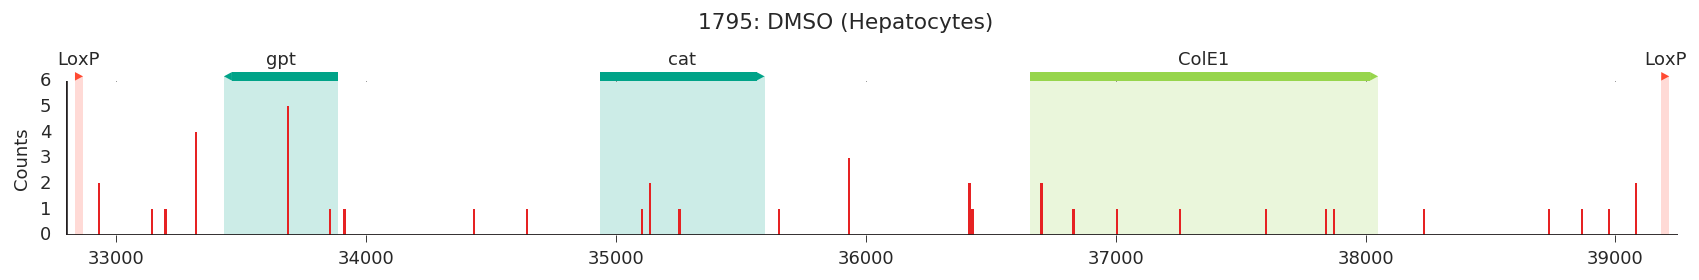

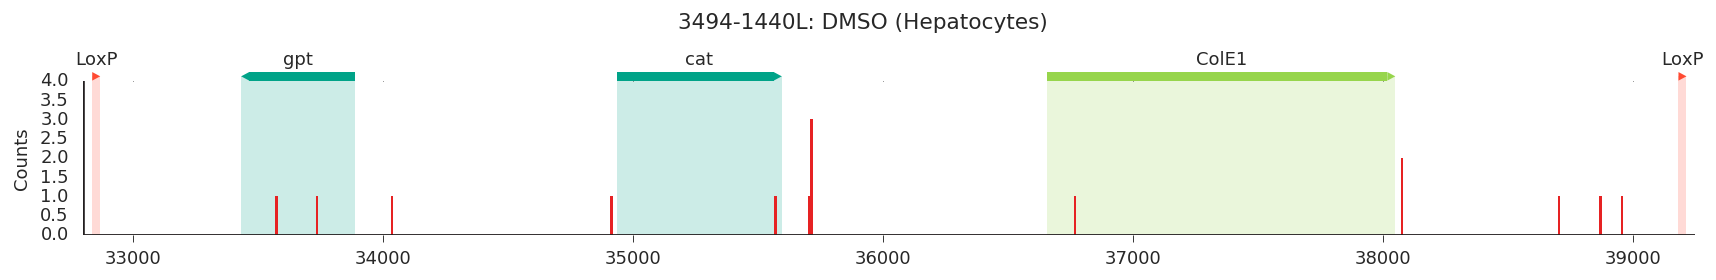

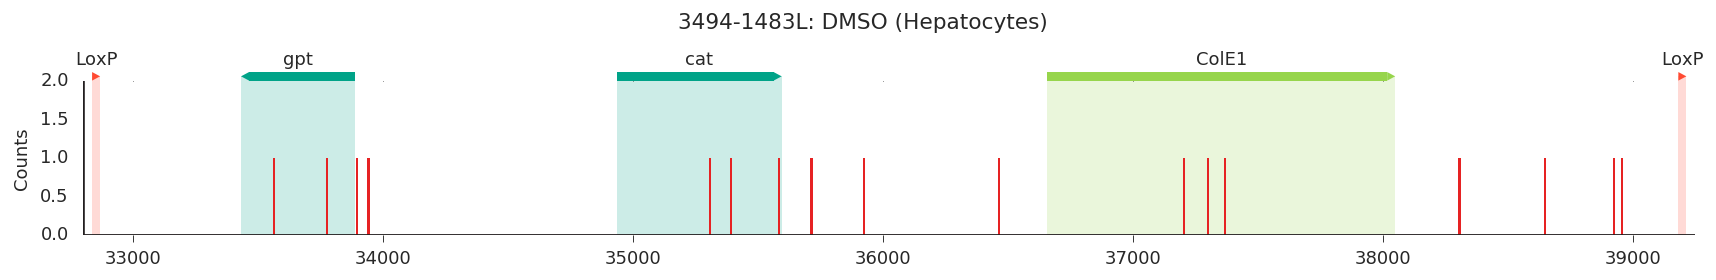

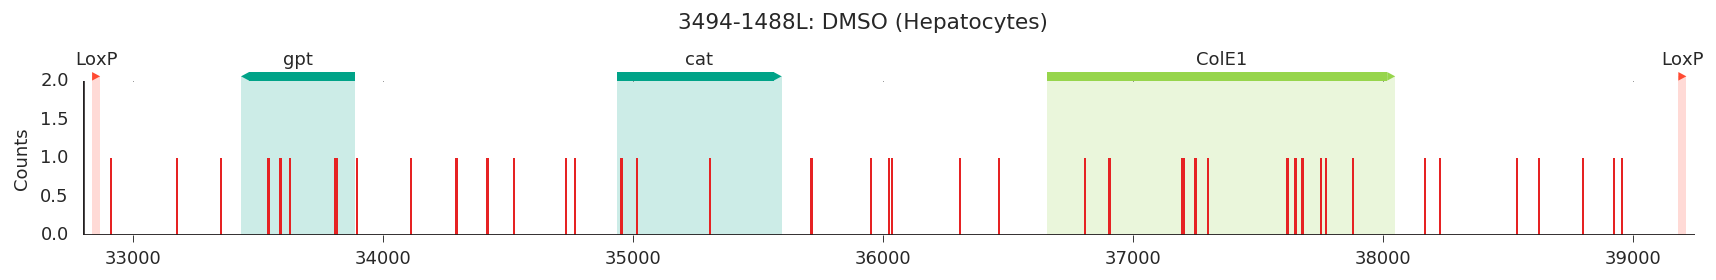

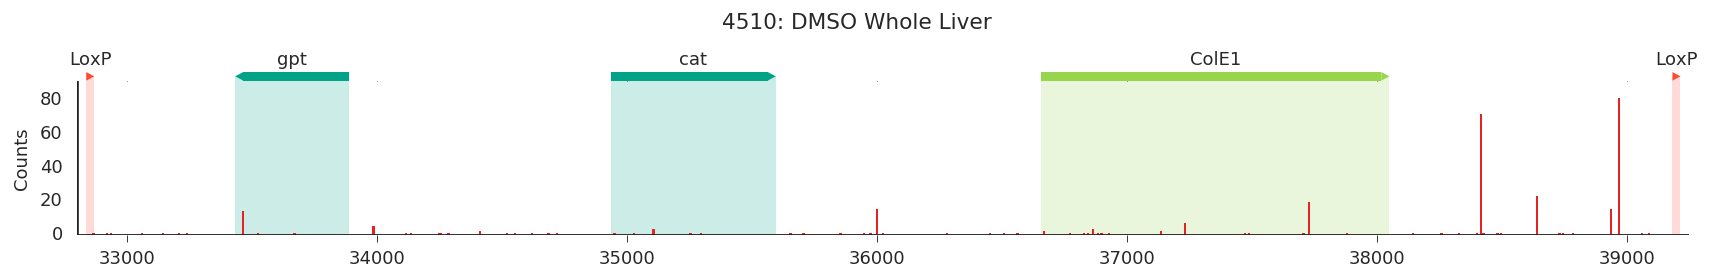

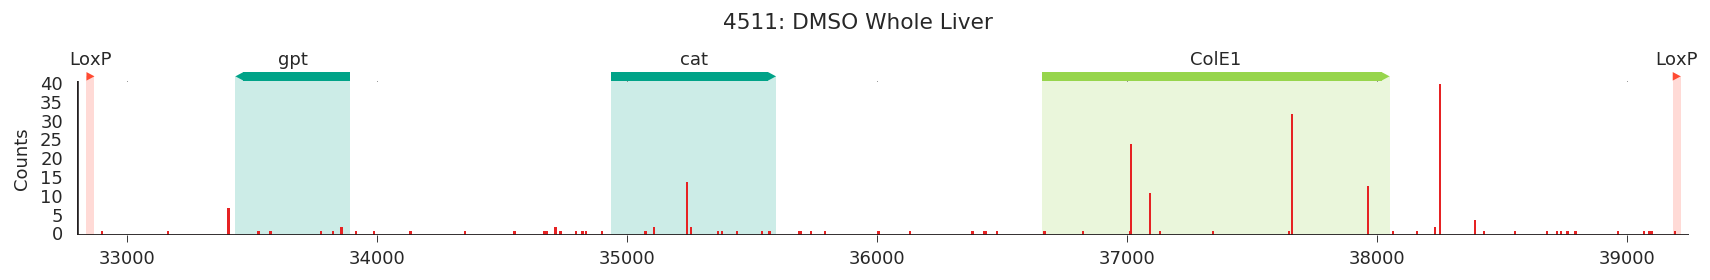

In [4]:
from siglib.mutpos import from_mutpos
from siglib.figures import variant_positions_plot

results = {}

for treatment in sorted(data_m[72].keys()):
    results[treatment] = {}
    for id, infile in sorted(data_m[72][treatment].items()):
        print('Sample: {}'.format(id))
        mutations = from_mutpos(infile, EG10fasta_file, clonality=clonality,
                                notation=notation, min_depth=min_depth, verbose=True)
        results[treatment][id] = mutations
        gff, ax = variant_positions_plot(positions=[m.position for m in sorted(set(mutations))],
                                         heights=[m.observed for m in sorted(set(mutations))],
                                         gff_file=EG10gff_file,
                                         title='{}: {}'.format(id, treatment),
                                         varplot_kwds={'xlabel': '', 'ylabel': 'Counts'})

Visualize Spectrum of Mutations in 3-mer Contexts
---

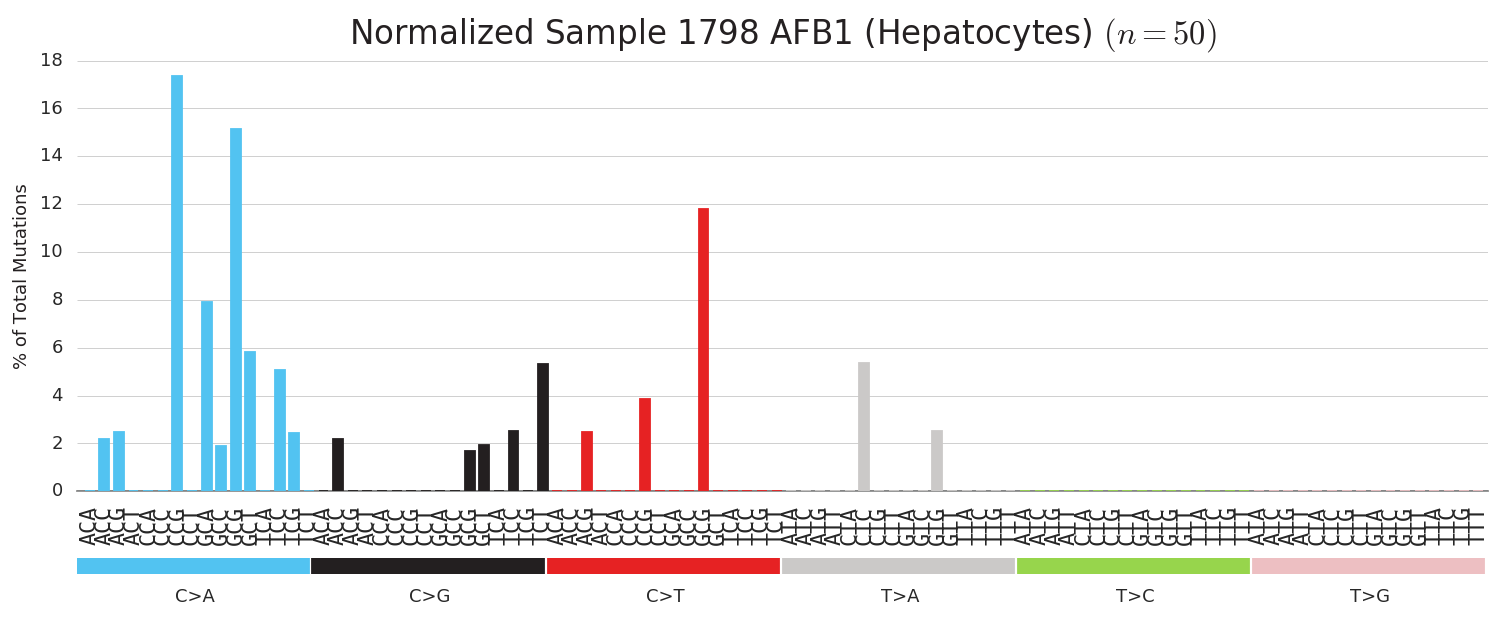

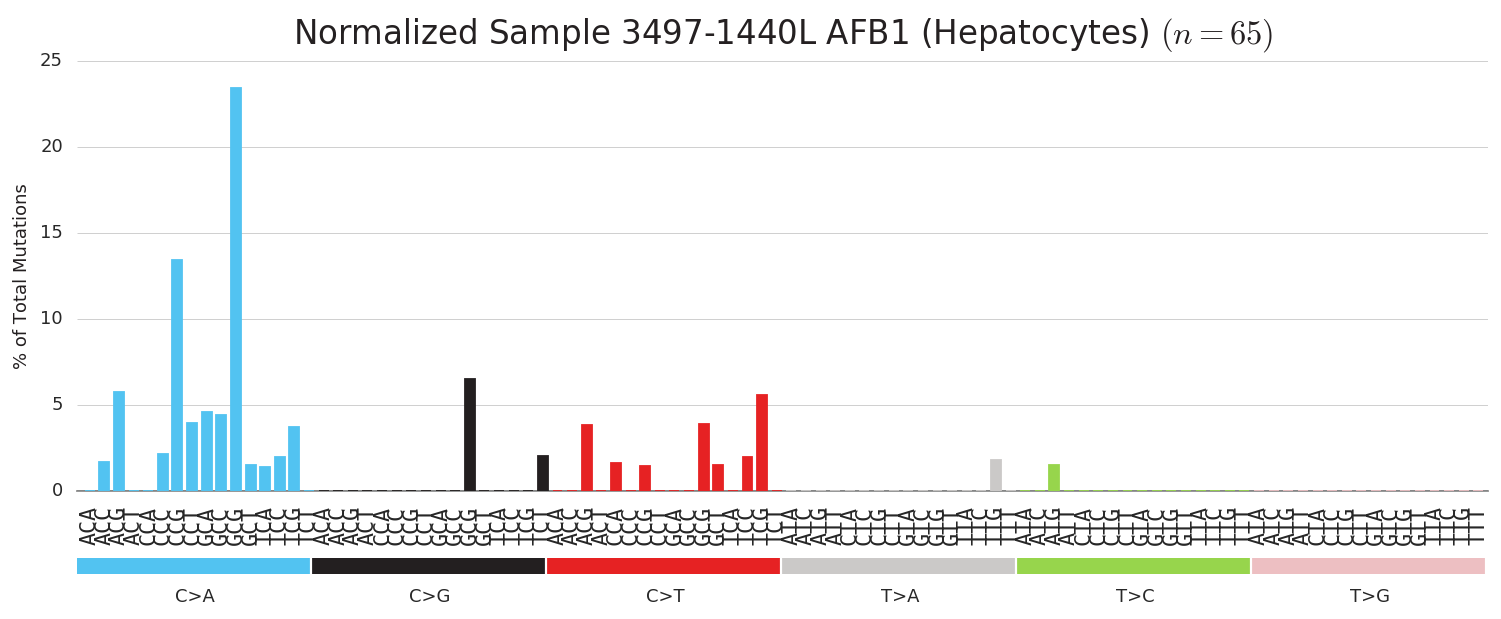

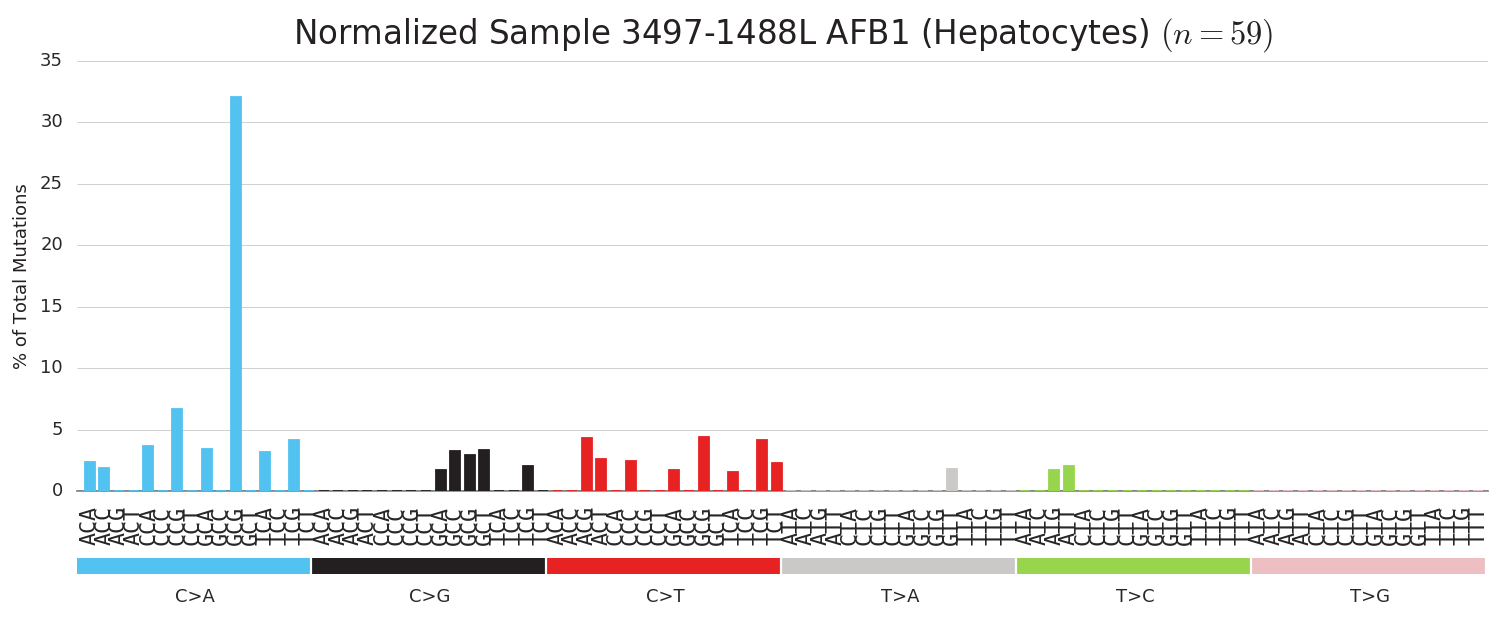

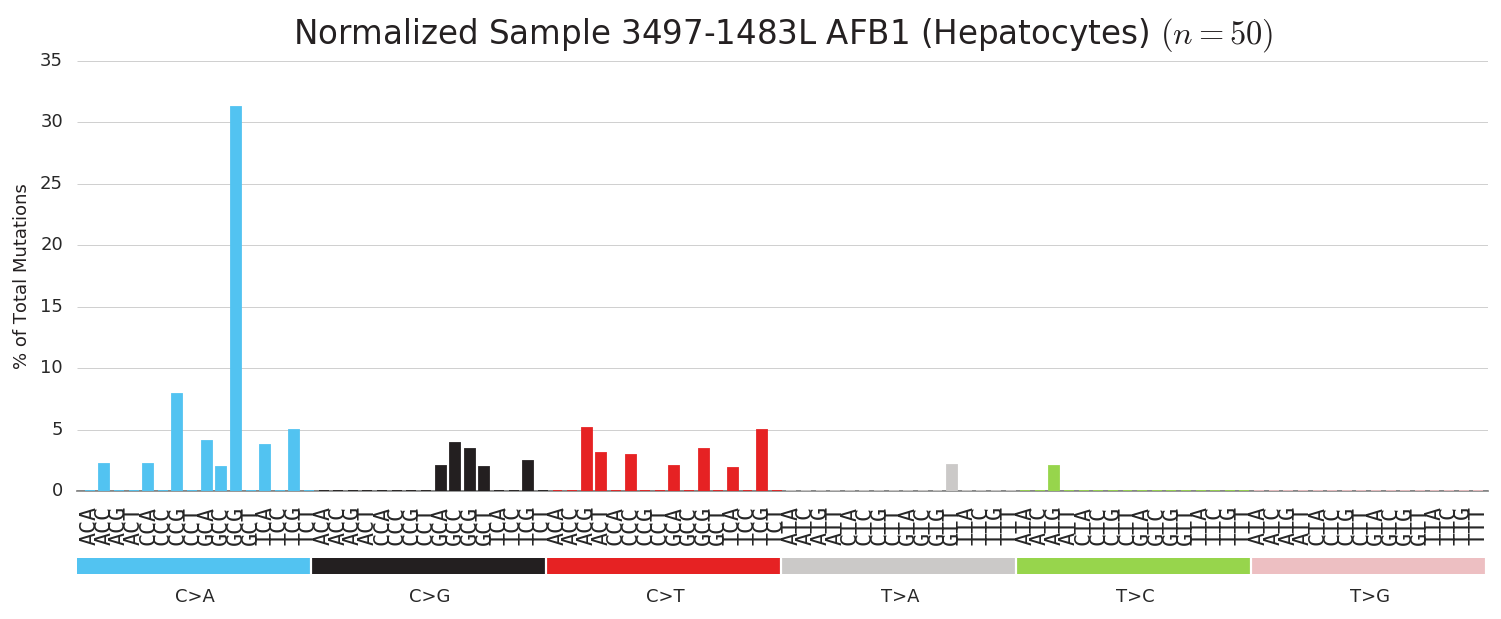

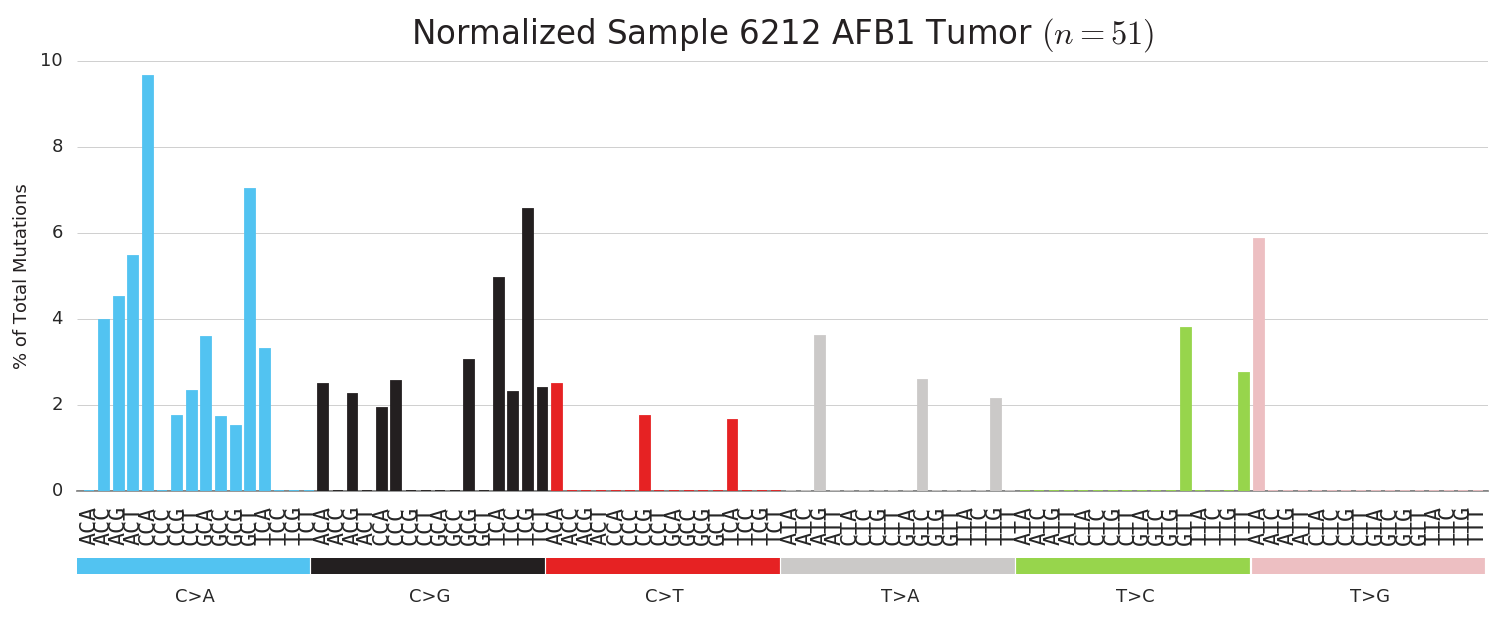

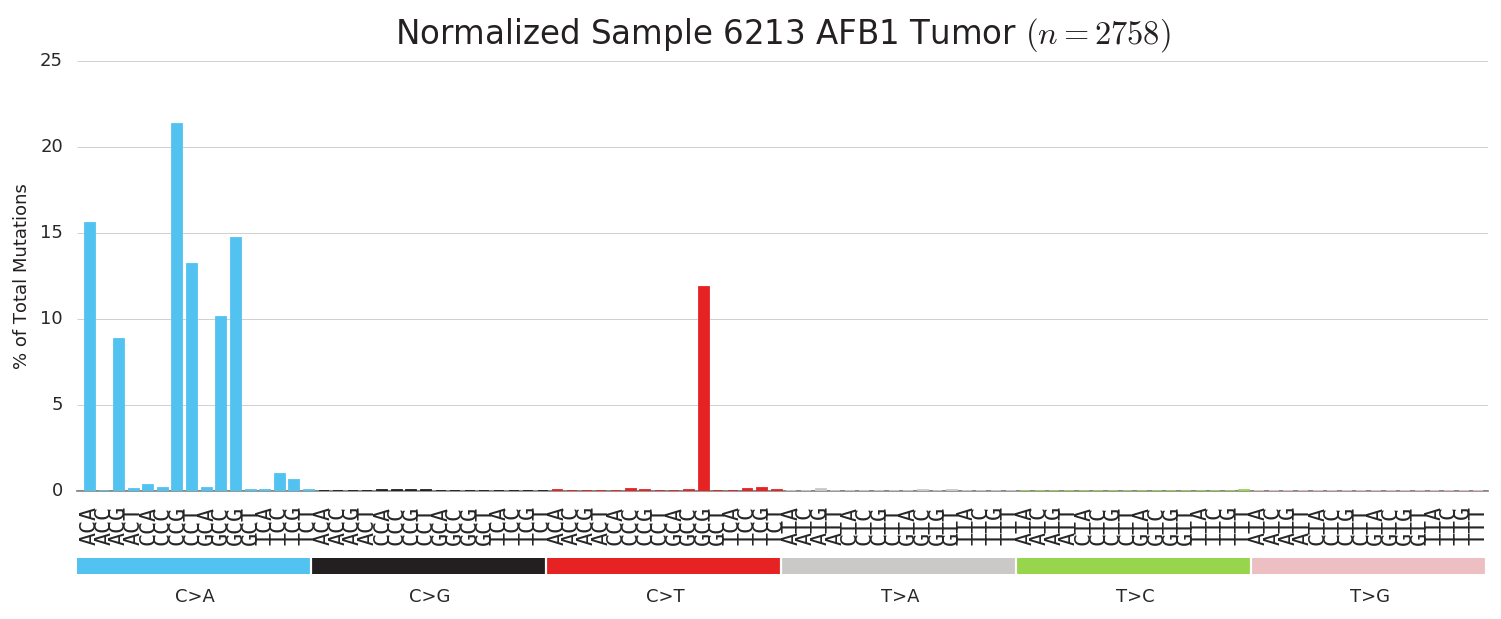

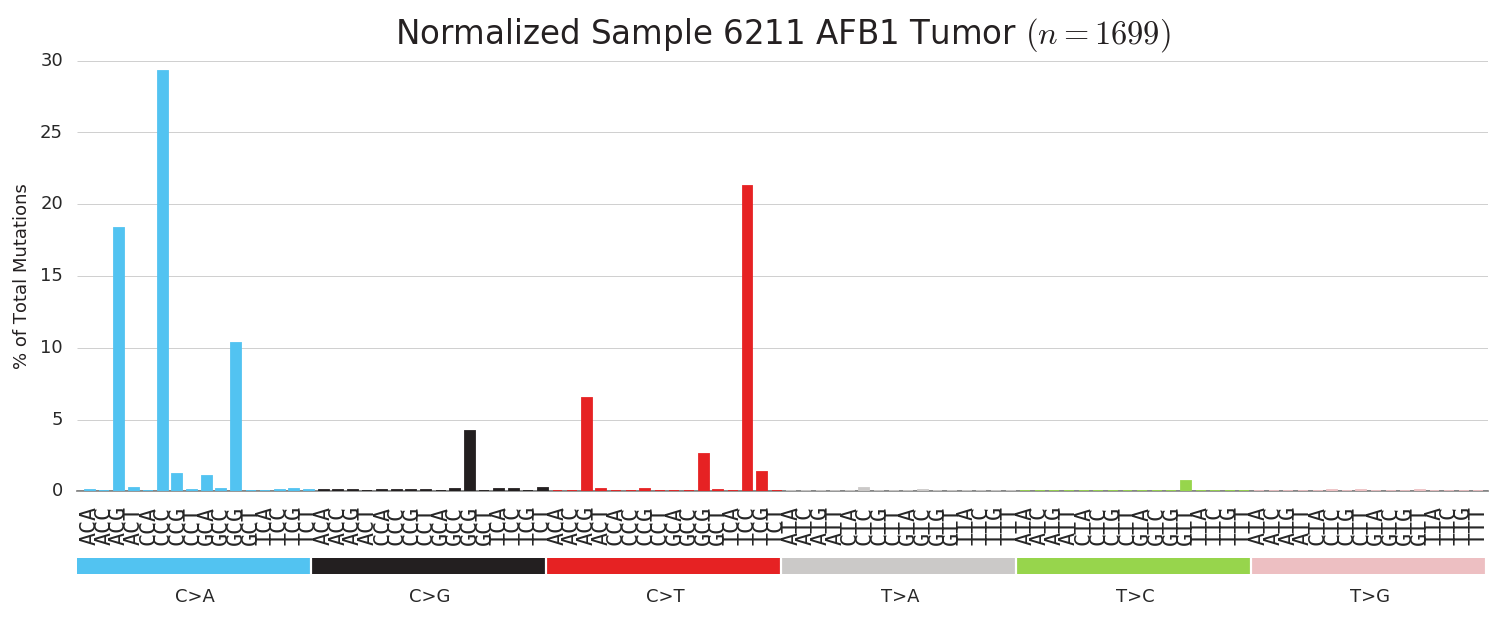

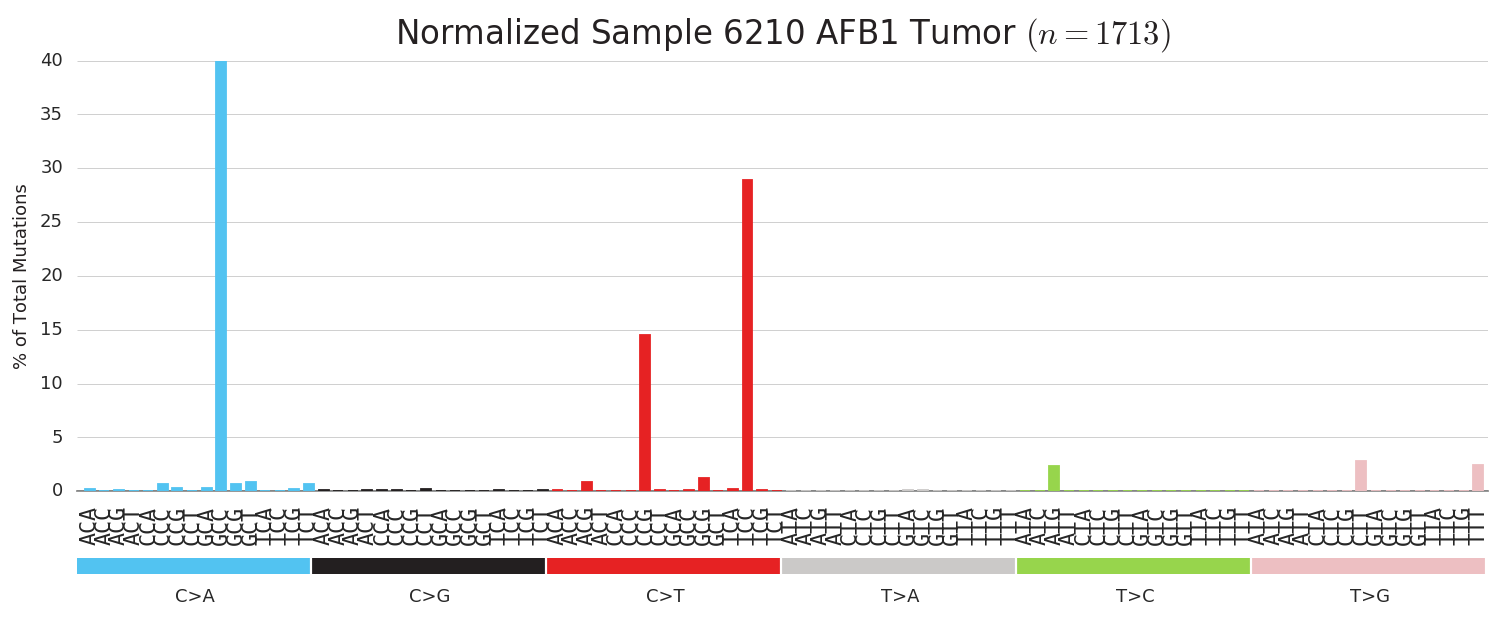

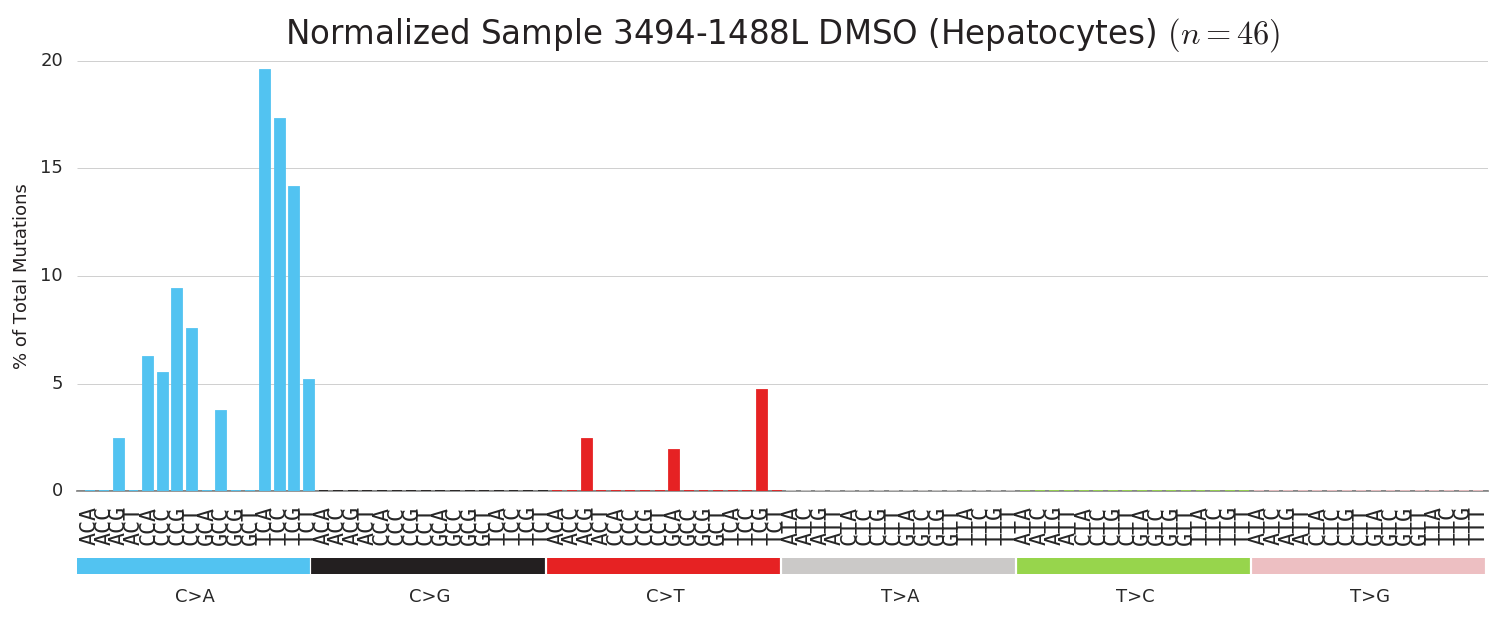

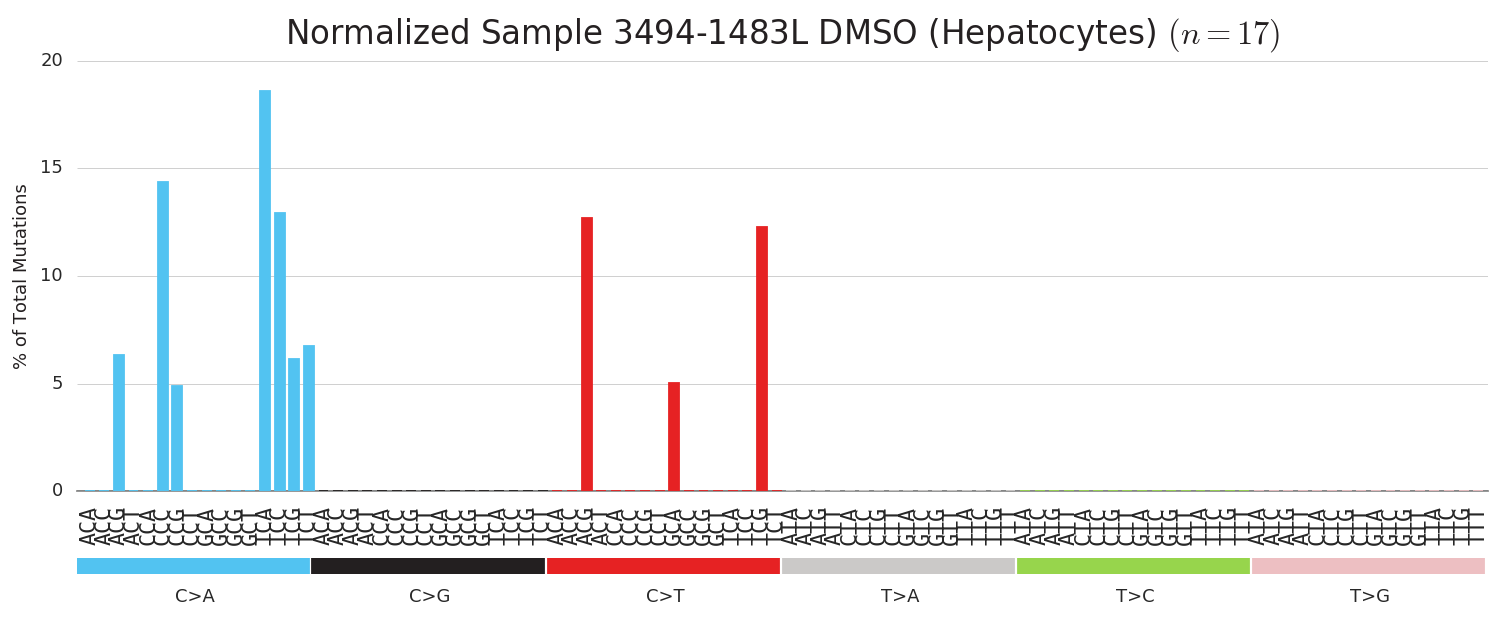

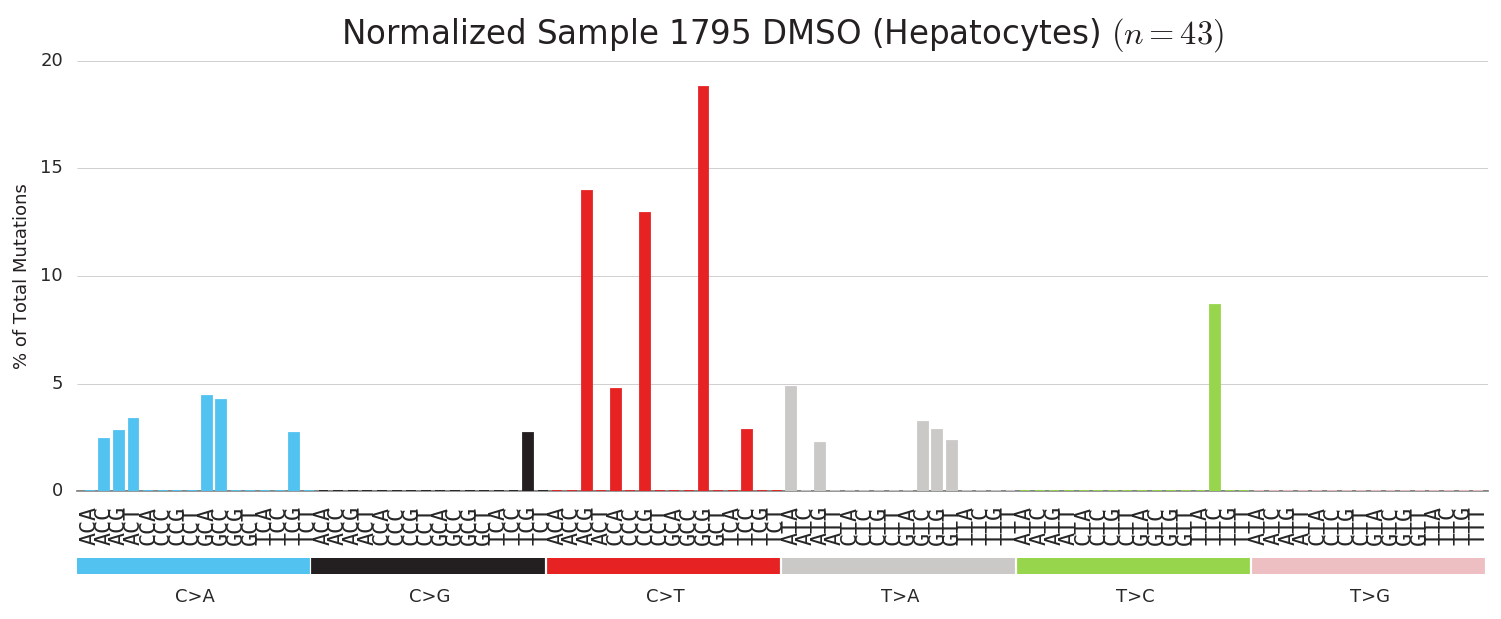

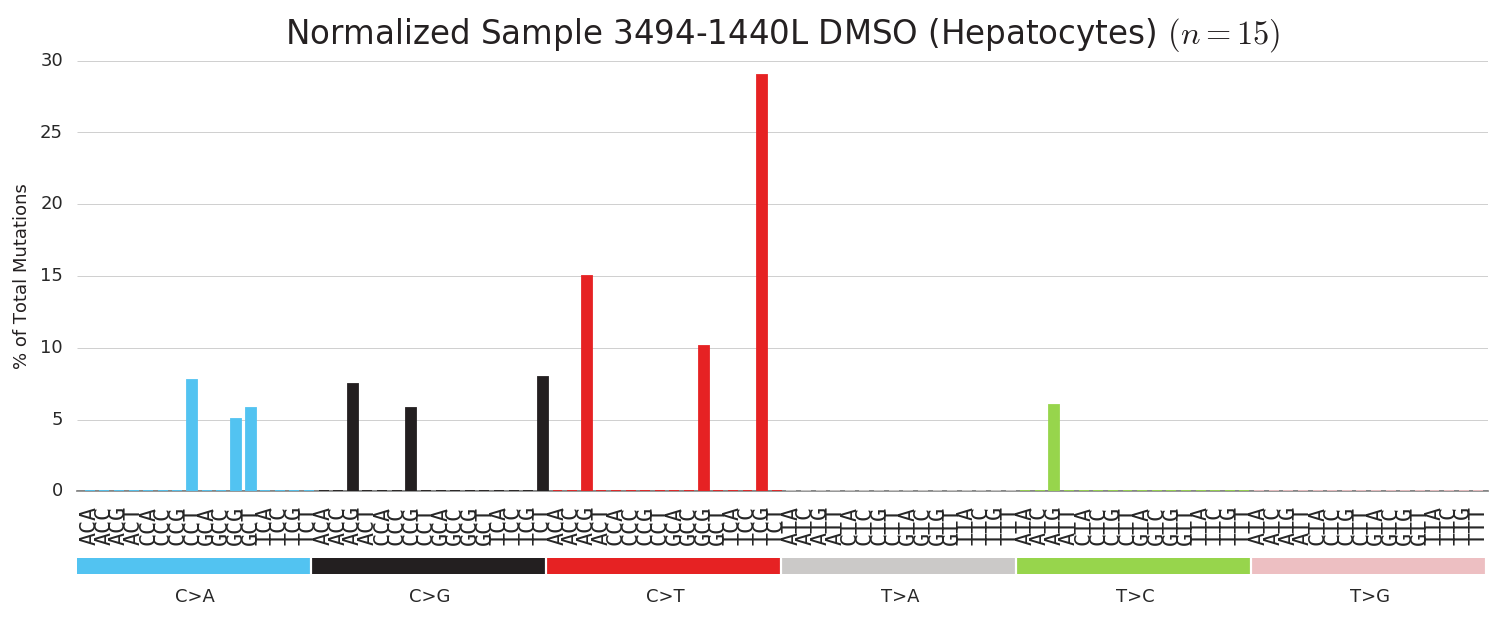

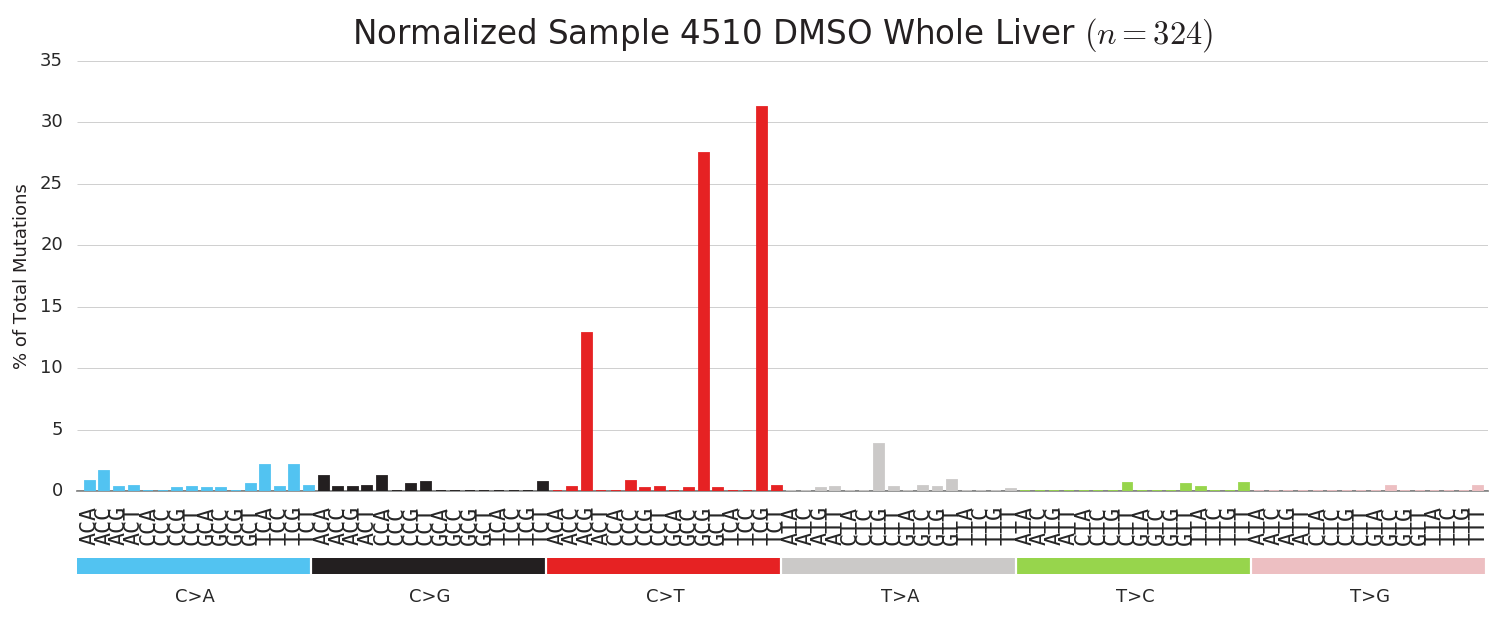

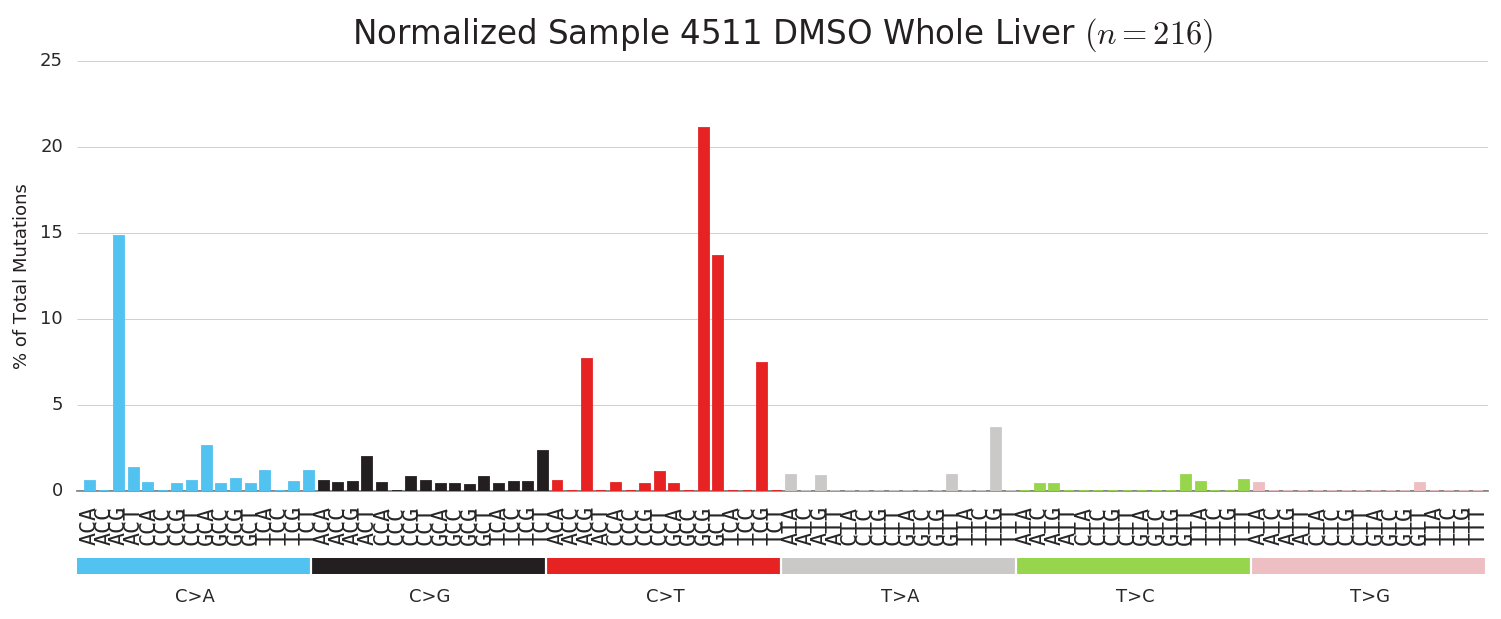

In [6]:
from siglib.utils import Spectrum
from siglib.figures import spectrum_map

for treatment in results:
    for id, mutations in results[treatment].items():
        spectrum = Spectrum(notation=notation, kmer=3)
        for mutation in set(mutations):
            spectrum[str(mutation.substitution), str(mutation.context)] += mutation.observed
        title = 'Normalized Sample {} {} $(n={})$\n\n'.format(id, treatment, spectrum.variant_total)
        spectrum_map(x=1, y=1,
                     heights=[[x * 100 for x in spectrum.normalized_proportion(j.normal())]],
                     xlabels=[spectrum.contexts],
                     labels=sorted(set(spectrum.sub_types)),
                     titles=[title])

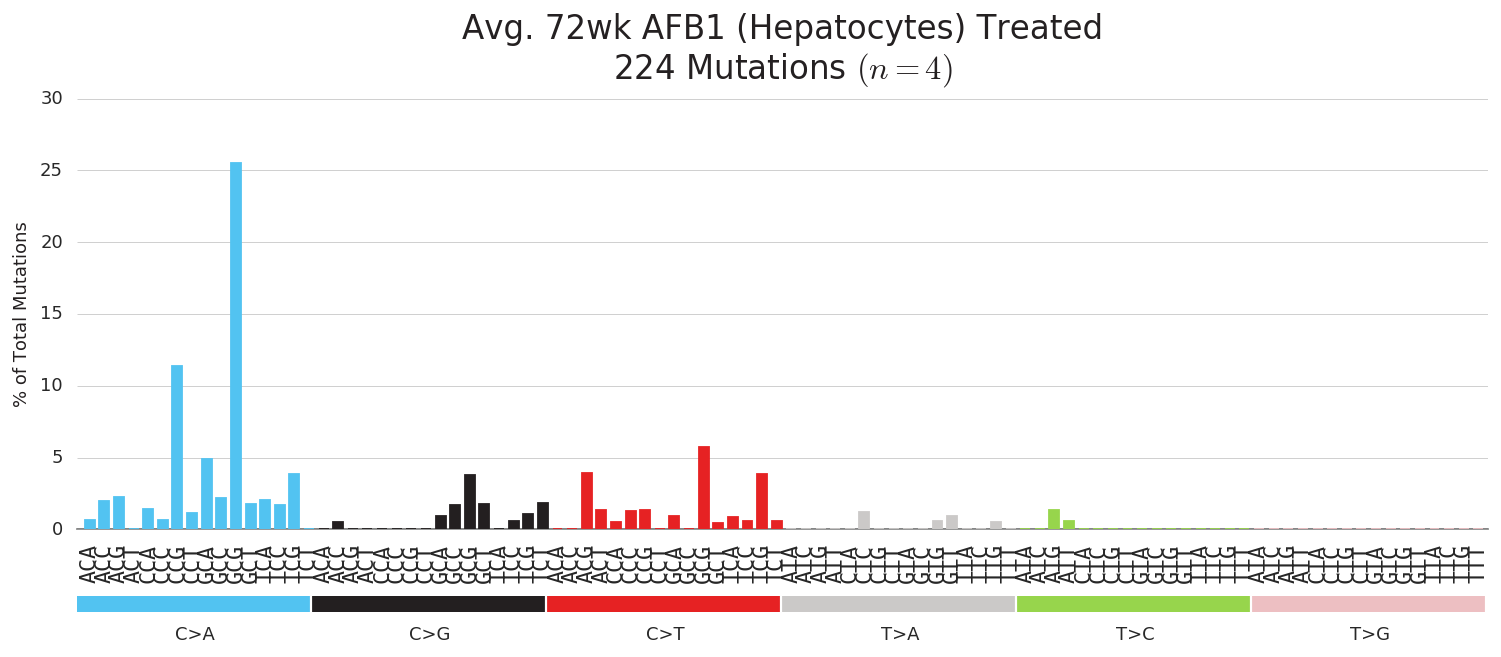

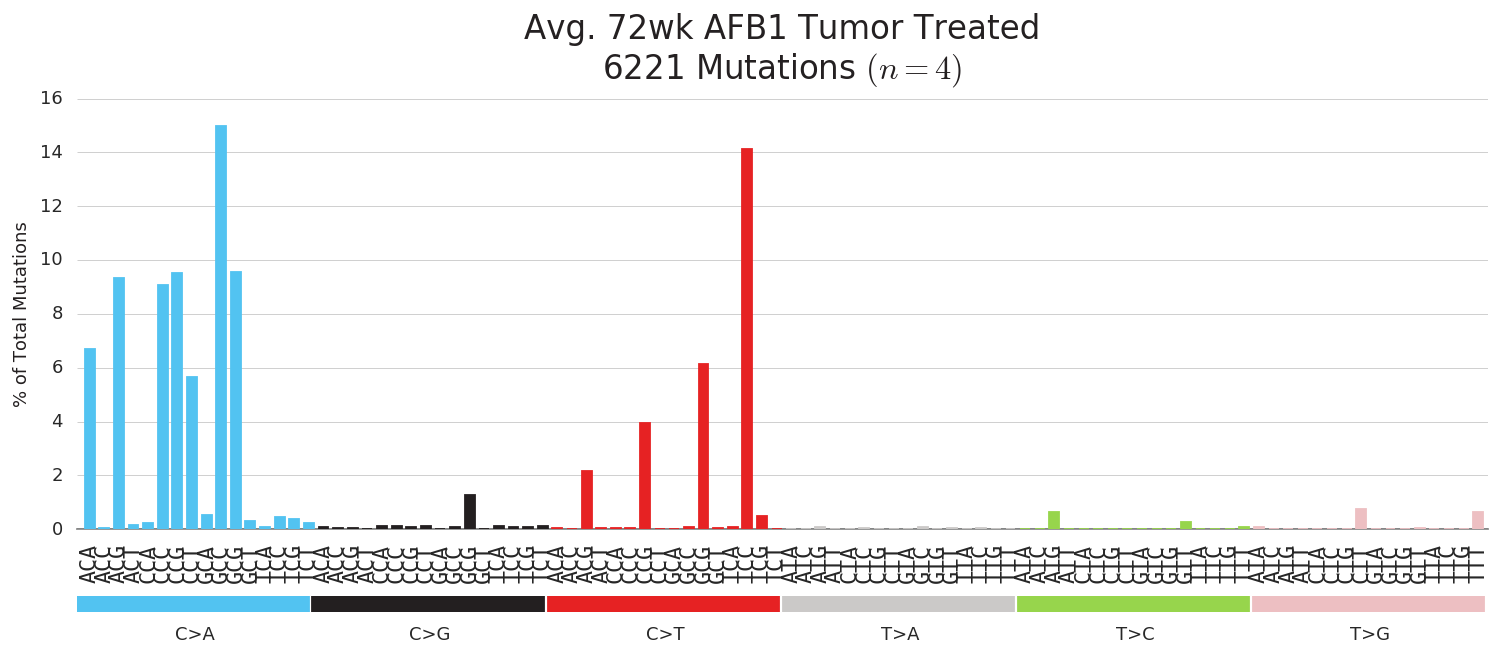

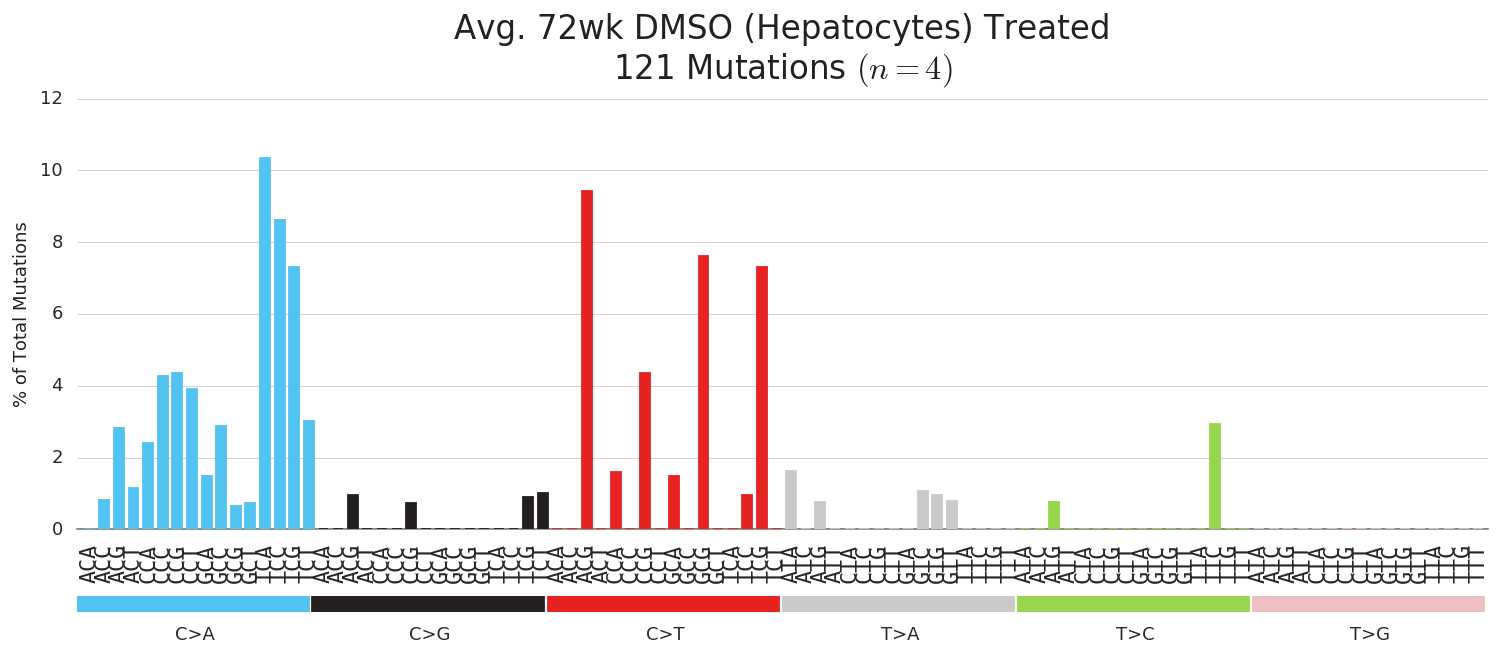

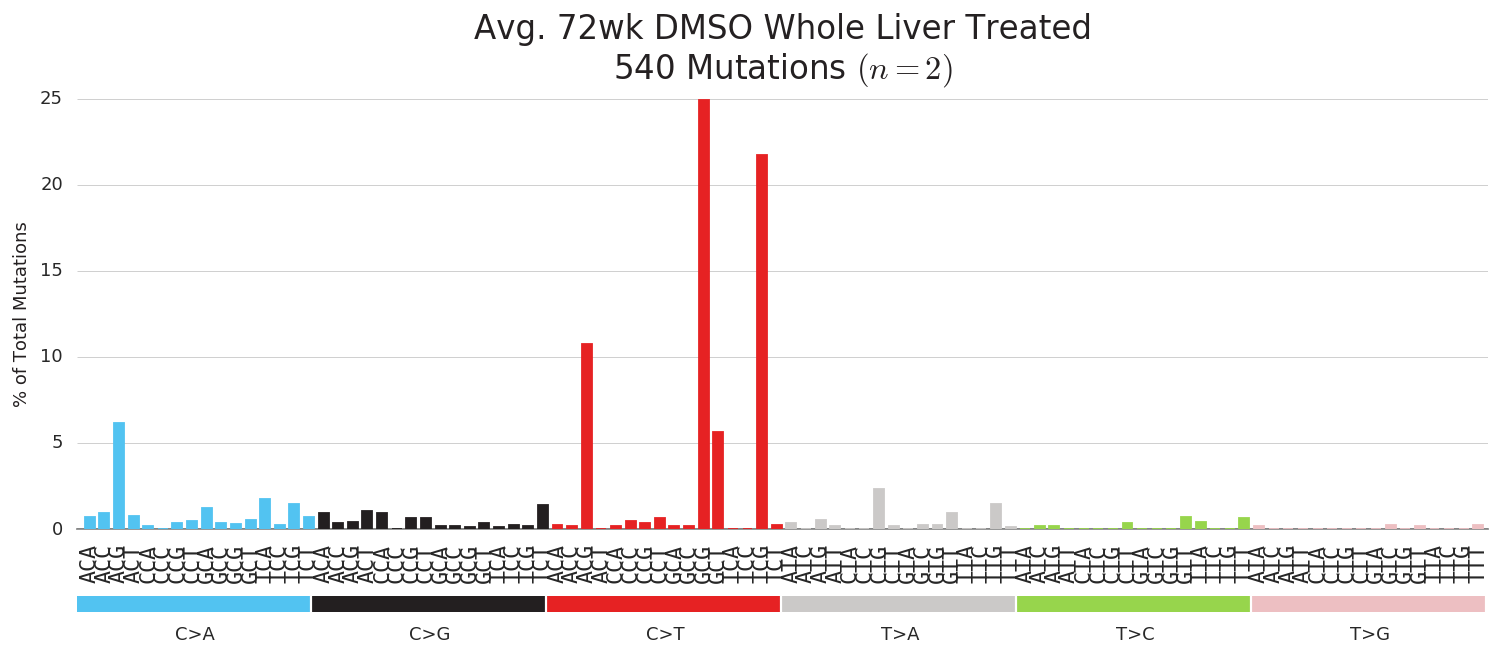

In [8]:
import matplotlib.pyplot as plt

filenames = {
    'AFB1 Tumor': 'A72T_(0,0.4)clones',
    'DMSO Whole Liver': 'D72_(0,0.4)clones',
    'AFB1 (Hepatocytes)': 'A72H_(0,0.4)clones',
    'DMSO (Hepatocytes)': 'D72H_(0,0.4)clones'
}

for treatment in results.keys():
    outfile = filenames[treatment]
    full_sum = Spectrum(notation=notation)
    samples = 0
    for id, mutations in results[treatment].items():
        samples += 1
        for mutation in set(mutations):
            full_sum[str(mutation.substitution), str(mutation.context)] += mutation.observed

    title = 'Avg. 72wk {} Treated\n{} Mutations $(n={})$\n\n'.format(treatment, full_sum.variant_total, samples)
    spectrum_map(x=1, y=1,
                 heights=[[x * 100 for x in full_sum.normalized_proportion(j.normal())]],
                 xlabels=[full_sum.contexts],
                 labels=sorted(set(full_sum.sub_types)),
                 titles=[title])
    plt.savefig('{}.pdf'.format(outfile))